In [2]:
import pandas as pd

In [3]:
import numpy as np

In [19]:
from sklearn.metrics import  silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [130]:
df = pd.read_csv("hw3-2.csv", header = None, sep=",")

In [131]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
#df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [133]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
#Checking if there are any null values in the dataset
null_count=df.isnull().sum()
null_count

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

In [135]:
null_count.describe()

count    784.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [136]:
#Removing the colums which contain only zeros
non_zero_df = df.loc[:, (df != 0).any(axis=0)]
non_zero_df

,33,34,35,36,37,38,39,40,41,42,...,768,769,770,771,772,773,774,775,776,777
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
#Scaling the dataset and converting it into an n-dimensional numpy array.
np_df = (non_zero_df.to_numpy(copy= True))/255

In [138]:
np_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
#time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
fit_data = tsne.fit_transform(np_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 6.807s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030843
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.610329
[t-SNE] KL divergence after 300 iterations: 2.962187


In [145]:
df1 = fit_data

In [126]:
def Pred(data, centroids, k =2):
  cluster = np.empty(len(df))
  for i in range(len(data)):
    min_distance = np.Inf
    for cluster in range(k):
      distance = np.linalg.norm(data[i]-centroids[cluster])
      if distance < min_distance:
        min_distance = distance
        cluster[i] = cluster
  return cluster

In [127]:
def Move_Centroid(centroids, k, attributes, instances, cluster, data):
  previous_centroids = centroids.copy()
  #current_centroids = np.empty(initial_centroids.shape)
  for cluster in range(k):
    for column in range(attributes):
      sum = 0.0
      count = 0.0
      average =None
      for row in range(instances):
        if(cluster == cluster[row]):
          sum += data[row, column]
          count+=1
          if count >0:
            average = sum/ count
        centroids[cluster, column] = average
  return previous_centroids, centroids

In [128]:
def recursion(fit_data, k):  
  initial_centroids = fit_data[np.random.choice(fit_data.shape[0], size = k, replace= False)]
  attributes = fit_data.shape[1]
  instances = len(df)
  centroids_the_same = False
  current_centroids = np.empty(initial_centroids.shape)
  previous_centroids = initial_centroids
  Initial_cluster = Pred(fit_data, initial_centroids,k)
  previous_cluster = Initial_cluster
  new_cluster = np.empty(Initial_cluster.shape)
  max_iterations = 50
  scores =[]
  score = 0.0
  while max_iterations > 0 and (not(centroids_the_same)):
    previous_centroids, current_centroids = Move_Centroid(initial_centroids,k,attributes, instances,Initial_cluster, fit_data)
    centroids_the_same = (np.array_equal(previous_centroids,current_centroids) and score > 0.035)
    new_cluster=cluster(fit_data, current_centroids, k)
    score = silhouette_score(fit_data, new_cluster)
    previous_cluster = new_cluster
    max_iterations -=1
  print(new_cluster)
  return new_cluster

In [149]:
new_cluster = recursion(fit_data, k=10)

[5. 1. 7. ... 7. 7. 3.]


In [150]:
df2 = new_cluster.astype(int)

In [158]:
df3 = df2 + 1

In [161]:
np.savetxt('output1-10.txt', df3, fmt='%s')

In [160]:
df2

array([5, 1, 7, ..., 7, 7, 3])

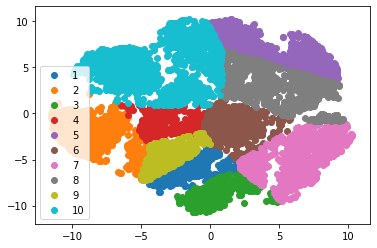

In [163]:
#Getting unique labels
u_labels = np.unique(df3)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df1[df3 == i , 0] , df1[df3 == i , 1] , label = i)
plt.legend()
plt.show()